In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [16]:
data_dir = 'Resources/nasa_bearing/2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    #print(dataset)
    dataset_mean_abs = np.array(dataset.abs().mean())
    #print(len(dataset_mean_abs))
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

In [17]:
merged_data

Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004.02.12.10.32.39   0.058333   0.071832   0.083242   0.043067
2004.02.12.10.42.39   0.058995   0.074006   0.084435   0.044541
2004.02.12.10.52.39   0.060236   0.074227   0.083926   0.044443
2004.02.12.11.02.39   0.061455   0.073844   0.084457   0.045081
2004.02.12.11.12.39   0.061361   0.075609   0.082837   0.045118
...                        ...        ...        ...        ...
2004.02.19.05.42.39   0.453335   0.161016   0.137440   0.119047
2004.02.19.05.52.39   0.337583   0.132400   0.144992   0.092125
2004.02.19.06.02.39   0.351111   0.152266   0.151299   0.100817
2004.02.19.06.12.39   0.001857   0.003732   0.003656   0.001786
2004.02.19.06.22.39   0.001168   0.000767   0.000716   0.001699

[984 rows x 4 columns]

In [18]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.head()

Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118

<AxesSubplot:>

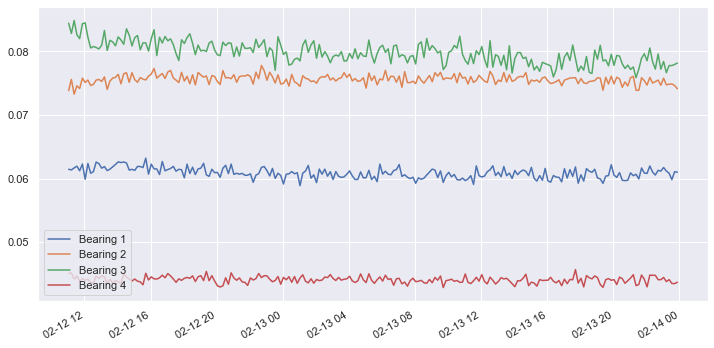

In [19]:
#splitting the training and test data
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (12,6))